In [40]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from tensorflow import keras
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2

In [41]:
datadir = 'D://actors//'
categories = ['akshay', 'vani', 'srk', 'hritik', 'katrina']


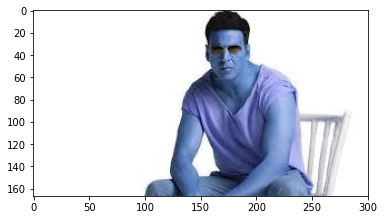

In [42]:
for cat in categories:
    path = os.path.join(datadir,cat)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

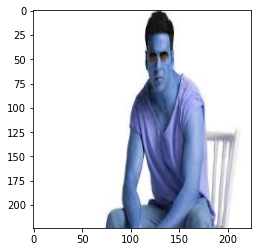

In [43]:
IMG_SIZE = 224 


new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [44]:
get_data = []
def create_data():
    for cat in categories:
        path = os.path.join(datadir,cat)
        class_num  = categories.index(cat)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                get_data.append([new_array, class_num])
            except Exception as e:
                pass

create_data()


In [45]:
print(len(get_data))

478


In [46]:
np.array(get_data[0]).shape

C:\Users\Saurabh\AppData\Local\Temp/ipykernel_18060/3622189477.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(get_data[0]).shape


(2,)

In [47]:
import random
random.shuffle(get_data)

In [48]:
for sample in get_data:
    print(sample[1])

3
3
4
1
0
4
2
2
2
2
0
3
1
3
2
4
0
4
1
1
2
2
0
4
2
4
3
2
3
4
3
4
3
2
3
3
3
4
0
1
3
4
4
2
1
3
1
4
0
0
2
3
2
2
1
4
1
0
1
4
3
2
2
2
1
2
3
0
0
0
3
3
0
4
3
2
1
0
2
2
3
2
2
3
4
4
0
3
2
3
4
1
0
4
4
3
1
2
1
0
1
4
0
2
4
1
1
2
0
3
0
3
4
3
1
4
2
1
2
0
2
4
1
2
1
4
0
4
2
2
1
4
0
4
2
0
2
0
4
2
1
3
4
3
0
0
0
1
1
4
3
0
3
3
3
3
4
1
3
2
4
3
1
1
2
4
3
1
3
2
2
3
0
3
3
2
3
2
2
1
2
0
3
4
4
0
4
2
2
1
0
2
0
3
4
3
3
2
4
4
1
3
3
0
2
1
3
0
4
1
1
4
1
0
3
0
2
4
1
3
2
4
1
3
4
2
3
2
2
3
2
4
4
4
4
0
3
4
2
3
2
3
2
2
2
0
2
2
4
1
2
3
2
1
3
4
0
2
4
0
3
4
4
2
0
3
0
3
3
3
3
2
0
2
1
0
3
1
3
0
3
0
4
1
2
0
0
4
4
1
4
4
4
2
1
1
0
4
4
4
4
1
2
4
3
3
3
3
0
4
0
3
1
3
1
3
0
4
0
3
3
1
4
0
3
1
0
1
0
2
3
0
0
2
4
1
1
2
4
4
3
2
0
4
0
4
1
3
0
1
4
2
4
0
1
3
4
0
3
2
4
3
3
1
1
0
1
4
3
3
3
1
1
4
3
4
1
4
0
4
1
3
3
3
2
1
2
1
4
4
2
2
0
3
2
2
0
0
2
1
0
0
4
2
2
3
0
4
2
4
4
3
3
4
2
0
0
4
1
4
4
0
1
2
3
4
3
1
4
1
4
0
2
2
1
3
1
2
3
3
2
0
0
0
2
1
0
2
1
1
3
2
1
3
2
2
1
3
2
0
4
0
0
0
0
0
0
4
2
3
4
4
2
3
2
3
0
4


In [49]:
x = []
y = []

In [50]:
for features, labels in get_data:
    x.append(features)
    y.append(labels)    
    
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 3 )

In [51]:
x.shape

(478, 224, 224, 3)

In [52]:
y_ = keras.utils.to_categorical(y)

In [53]:
y_

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [54]:
from keras.layers import Flatten, Dense

In [55]:
from keras.models import Model

In [56]:
model = VGG16

In [57]:
base_model = VGG16(weights='imagenet',include_top = False)

In [58]:
base_model.trainable = False

In [59]:
inputs = keras.Input(shape=(224, 224, 3))
z = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
z = keras.layers.GlobalAveragePooling2D()(z)
# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(5,activation = 'softmax')(z)
model = keras.Model(inputs, outputs)

In [60]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.Accuracy(),'Precision','Recall'])
history = model.fit(x, y_, epochs=20, validation_split=0.3)

Epoch 1/20
11/11 [==============================] - 114s 11s/step - loss: 5.7063 - accuracy: 0.0000e+00 - precision: 0.1839 - recall: 0.1707 - val_loss: 4.9206 - val_accuracy: 0.0000e+00 - val_precision: 0.1940 - val_recall: 0.1806
Epoch 2/20
11/11 [==============================] - 123s 11s/step - loss: 3.9474 - accuracy: 0.0000e+00 - precision: 0.2617 - recall: 0.2335 - val_loss: 4.0877 - val_accuracy: 0.0000e+00 - val_precision: 0.2279 - val_recall: 0.2153
Epoch 3/20
11/11 [==============================] - 118s 11s/step - loss: 2.9713 - accuracy: 0.0000e+00 - precision: 0.3737 - recall: 0.3323 - val_loss: 3.5316 - val_accuracy: 0.0000e+00 - val_precision: 0.2969 - val_recall: 0.2639
Epoch 4/20
11/11 [==============================] - 114s 11s/step - loss: 2.3131 - accuracy: 0.0000e+00 - precision: 0.4286 - recall: 0.3772 - val_loss: 3.1753 - val_accuracy: 0.0000e+00 - val_precision: 0.2971 - val_recall: 0.2847
Epoch 5/20
11/11 [==============================] - 119s 11s/step - loss

In [61]:
model.save('vgg_model.h5')

In [62]:
import tensorflow

In [63]:
new_model = tensorflow.keras.models.load_model('vgg_model.h5')


In [64]:
import glob
import PIL

In [65]:
flist = glob.glob('D://actors/*/*')

In [66]:
len(flist)

478

In [67]:
img_arr = np.array(cv2.imread(flist[0]))

In [68]:
img_arr=cv2.resize(img_arr,(224,224))

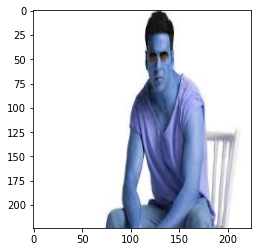

In [69]:
plt.imshow(img_arr)

In [70]:
img_arr = np.expand_dims(img_arr,axis=0)

In [71]:
img_arr.shape

(1, 224, 224, 3)

In [72]:
np.argmax(new_model.predict(img_arr))

1/1 [==============================] - 1s 589ms/step


3

In [73]:
dic = {'0':'aks','1':'vani','2':'srk','3':'hritik','4':'katrina'} 

In [74]:
def get_actor(img_arr):
    pred = np.argmax(new_model.predict(img_arr))
    return dic.get(str(pred))

In [75]:
def resize_img(img):
    img_arr = np.array(cv2.imread(img))
    
    img_arr=cv2.resize(img_arr,(224,224))
    plt.imshow(img_arr)
    plt.show()
    img_arr = np.expand_dims(img_arr,axis=0)
    return img_arr

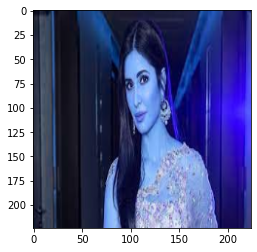

1/1 [==============================] - 0s 316ms/step


'katrina'

In [76]:
img = resize_img(flist[200])
get_actor(img)